# Test Re-test analysis

In [1]:
#Import python notebooks
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import scipy.io as sio
import os
import glob
from scipy.stats import norm
import math
# import arviz as az
# import pymc3 as pm
import pandas as pd
from datetime import date
plt.rcParams.update({'font.size': 16})

## Load the data

In [5]:
#Change the directory
os.chdir('C:\\Users\\Jonathan\\Documents\\GitHub\\Split-Belt-AFC-Reliability\\Data\\TestRetest_PSI')

#Load the data
File_names = glob.glob("*.mat")

print('Files:')

Combined_data = []
for i, f in enumerate(File_names):
    Current_Subject = f[:-9]
    print(f)
    
    D = sio.loadmat(f)
    
    #Make the dictionary 1d
    D['AllResponses'] = D['AllResponses'][0]
    D['AllStarts'] = D['AllStarts'][0]
    D['AllStims'] = D['AllStims'][0]
    D['BinaryResponses'] = D['BinaryResponses'][0]
    D['alpha_EV'] = D['alpha_EV'][0]
    D['beta_EV'] = D['beta_EV'][0]
    
    #Length
    Ntrials = len(D['BinaryResponses'])

    #Delete the unnecessary keys
    del D['None'], D['__header__'], D['__version__'], D['__globals__'], D['__function_workspace__']
    
    #Make the elapsed time key an array
    Test_Length = D.pop('elapsedTime') 
    D['Time'] = np.ones_like(D['BinaryResponses'])*Test_Length[0]

    #Subject ID and test number
    D['SID'] = [Current_Subject[:-1]]*Ntrials
    D['Test'] = [Current_Subject[-1]]*Ntrials
    
    #Create dataframe 
    currentDF = pd.DataFrame.from_dict(D)
    Combined_data.append(currentDF)
    
DF = pd.concat(Combined_data)

Files:
PSItest_02a_data.mat
PSItest_02b_data.mat
PSItest_03a_data.mat
PSItest_03b_data.mat
PSItest_04a_data.mat
PSItest_04b_data.mat
PSItest_05a_data.mat
PSItest_05b_data.mat
PSItest_06a_data.mat
PSItest_06b_data.mat


## Index Start positions and Test length

PSItest_02 a - Start Positions Unequal
PSItest_02 b - Start Positions Equal
PSItest_03 a - Start Positions Unequal
PSItest_03 b - Start Positions Equal
PSItest_04 a - Start Positions Equal
PSItest_04 b - Start Positions Unequal
PSItest_05 a - Start Positions Unequal
PSItest_05 b - Start Positions Unequal
PSItest_06 a - Start Positions Unequal
PSItest_06 b - Start Positions Equal


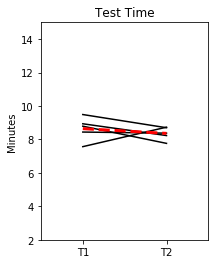

In [6]:
SIDs = pd.unique(DF.SID)
TNs = pd.unique(DF.Test)
Time = []
for i in range(len(SIDs)):
    
    T1 = DF.Time[(DF.SID==SIDs[i]) & (DF.Test=='a')].values[0]
    T2 = DF.Time[(DF.SID==SIDs[i]) & (DF.Test=='b')].values[0]
    Time.append([T1, T2])
    
    for t in range(len(TNs)):
        
        Starts = DF.AllStarts[(DF.SID==SIDs[i]) & (DF.Test==TNs[t])]
        Stims = DF.AllStims[(DF.SID==SIDs[i]) & (DF.Test==TNs[t])]
                
        TD = Starts > Stims 
        BU = Starts < Stims
        if sum(TD) == sum(BU):
            print(SIDs[i],  TNs[t], '- Start Positions Equal')
        elif sum(TD) != sum(BU):
            print(SIDs[i],  TNs[t], '- Start Positions Unequal')     
            
Time = np.array(Time)
Time /= 60

plt.figure(figsize=(3,4))
plt.plot([np.ones(len(Time)), np.ones(len(Time))*2], [Time[:,0], Time[:,1]] ,'k-')
plt.plot([1, 2],[np.mean(Time[:,0]), np.mean(Time[:,1])],'r--',lw=3)
plt.xlim(0.5, 2.5)
plt.ylim(2, 15)
plt.xticks([1,2],['T1', 'T2'])
plt.title('Test Time')
plt.ylabel('Minutes')
plt.show()

## Visualize each entire trial

In [7]:
DF.head()

,AllResponses,AllStarts,AllStims,BinaryResponses,alpha_EV,beta_EV,Time,SID,Test
0,[r],4,0,0,18.700574,22.884563,506.507682,PSItest_02,a
1,[l],-20,20,1,14.398472,21.935911,506.507682,PSItest_02,a
2,[l],-45,13,1,7.928333,15.196563,506.507682,PSItest_02,a
3,[r],30,7,0,9.251108,7.970972,506.507682,PSItest_02,a
4,[r],-22,10,0,10.864965,3.585853,506.507682,PSItest_02,a


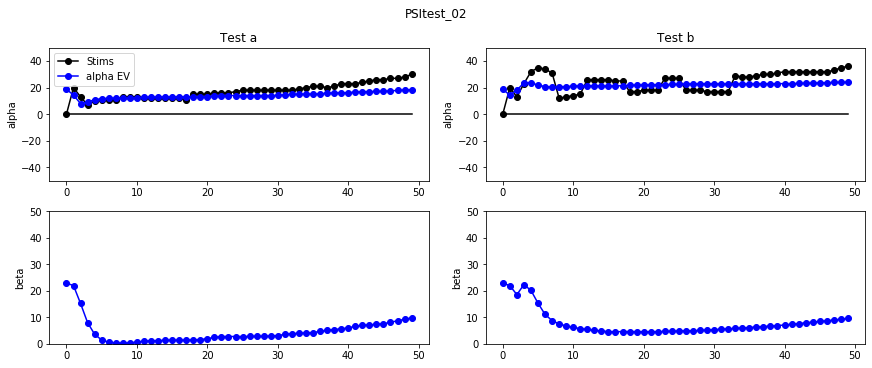

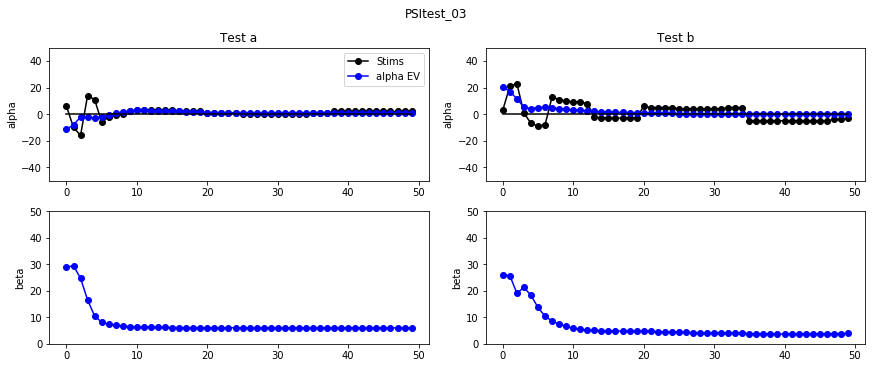

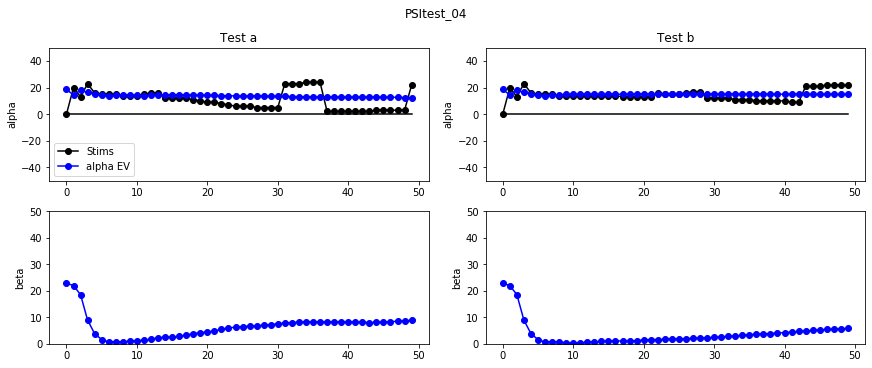

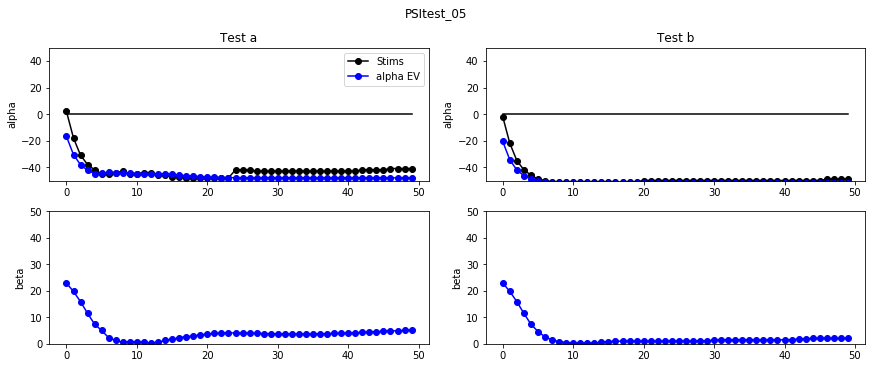

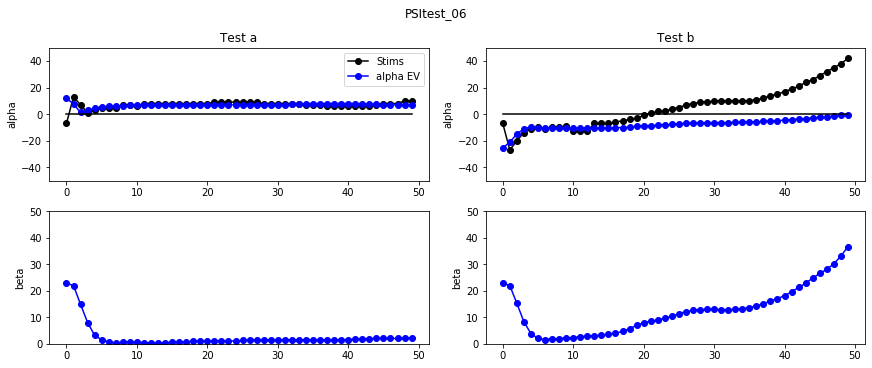

In [26]:
SIDs = pd.unique(DF.SID)
TNs = pd.unique(DF.Test)

for i in range(len(SIDs)):
    fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(12,5))
    
    for t in range(len(TNs)):
        Stims = DF.AllStims[(DF.SID==SIDs[i]) & (DF.Test==TNs[t])]
        Starts = DF.AllStarts[(DF.SID==SIDs[i]) & (DF.Test==TNs[t])]
        aEV = DF.alpha_EV[(DF.SID==SIDs[i]) & (DF.Test==TNs[t])]
        bEV = DF.beta_EV[(DF.SID==SIDs[i]) & (DF.Test==TNs[t])]
        
        ax[0,t].plot(Stims,'ko-',label='Stims')
        ax[0,t].plot(aEV,'bo-',label='alpha EV')
        ax[0,t].plot(np.zeros(len(Stims)),'k-')
        ax[0,t].set(ylim=(-50,50),ylabel='alpha',title='Test '+ TNs[t])
        if t == 0:
            ax[0,t].legend()

        
        ax[1,t].plot(bEV,'bo-')
        ax[1,t].set(ylim=(0,50),ylabel='beta')
    
    fig.suptitle(SIDs[i])
#     fig.show()

## Visually compare the two psychometric functions 


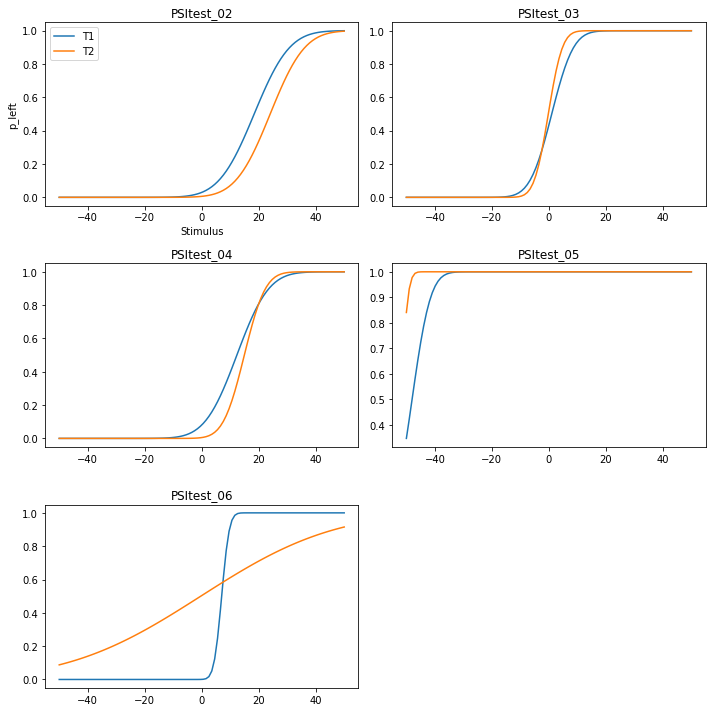

In [27]:
SIDs = pd.unique(DF.SID)
x = np.linspace(-50,50,100) #X-axis 

#Set up the figure
figrows = math.ceil(len(SIDs)/2)
plt.figure(figsize=(10,10))

#initialize for parameters
alphas = []
betas = []
for i in range(len(SIDs)):

    #index estimates for test 1 and 2
    aEV_1 = DF.alpha_EV[(DF.SID==SIDs[i]) & (DF.Test=='a')].values[-1]
    bEV_1 = DF.beta_EV[(DF.SID==SIDs[i]) & (DF.Test=='a')].values[-1]

    aEV_2 = DF.alpha_EV[(DF.SID==SIDs[i]) & (DF.Test=='b')].values[-1]
    bEV_2 = DF.beta_EV[(DF.SID==SIDs[i]) & (DF.Test=='b')].values[-1]
    
    #Store the estimates
    alphas.append([aEV_1, aEV_2])
    betas.append([bEV_1, bEV_2])
    
    #Calculate the psychometric functions
    psi_1 = norm.cdf(x,aEV_1,bEV_1)
    psi_2 = norm.cdf(x,aEV_2,bEV_2)

    plt.subplot(figrows,2,i+1)
    plt.plot(x,psi_1,label='T1')
    plt.plot(x,psi_2,label='T2')
    plt.title(SIDs[i])
    if i==0:
        plt.legend()
        plt.ylabel('p_left')
        plt.xlabel('Stimulus')
        
plt.tight_layout()
plt.show()

alphas = np.array(alphas)
betas = np.array(betas)

## Compare the parameters

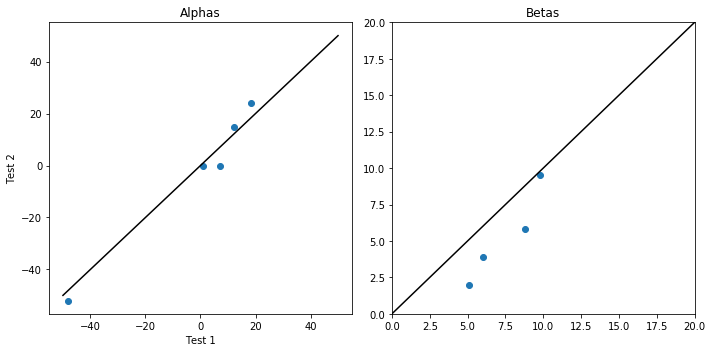

In [32]:
#Calculate CCC


#Plot the parameters
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(alphas[:,0],alphas[:,1],'o')
plt.plot(x,x,'k')
plt.title('Alphas')
plt.xlabel('Test 1')
plt.ylabel('Test 2')

plt.subplot(1,2,2)
plt.plot(betas[:,0],betas[:,1],'o')
plt.plot(x,x,'k')
plt.title('Betas')
plt.ylim(0, 20)
plt.xlim(0, 20)

plt.tight_layout()
plt.show()
